In [1]:
import pandas as pd

# **Load data as csv**

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [73]:
df.describe()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
count,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000
mean,2.449133,204.631675,2.173951,0.364932,-3.057997
std,1.866003,102.620500,2.627398,0.343305,2.096502
min,-7.571400,16.043000,0.000000,0.000000,-11.600000
25%,1.414900,122.126000,0.000000,0.000000,-4.332250
50%,2.340300,183.594500,1.000000,0.375000,-2.870500
75%,3.406475,270.715750,3.000000,0.666667,-1.600000
max,10.388600,780.949000,23.000000,1.000000,1.580000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             1144 non-null   float64
 1   MolWt               1144 non-null   float64
 2   NumRotatableBonds   1144 non-null   float64
 3   AromaticProportion  1144 non-null   float64
 4   logS                1144 non-null   float64
dtypes: float64(5)
memory usage: 44.8 KB


(array([  1.,   4.,  33.,  48.,  99., 210., 288., 269., 137.,  55.]),
 array([-11.6  , -10.282,  -8.964,  -7.646,  -6.328,  -5.01 ,  -3.692,
         -2.374,  -1.056,   0.262,   1.58 ]),
 <BarContainer object of 10 artists>)

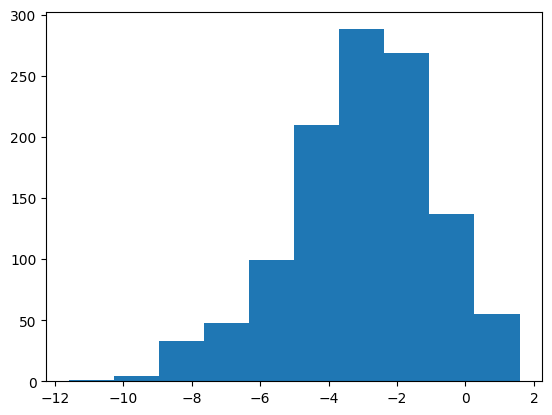

In [84]:
plt.hist(df['logS'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6a85c8a620>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6a87d2fb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6a85c8a860>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6a87d2f220>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6a87d2c610>],
 'means': []}

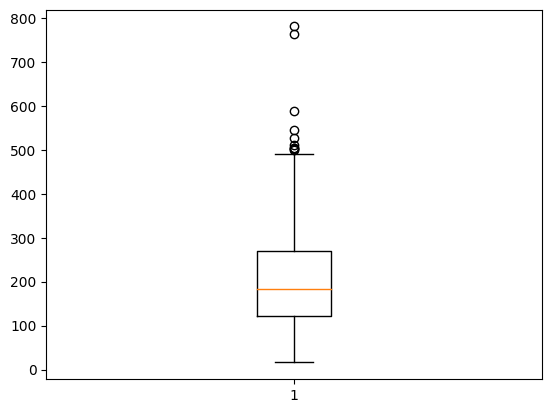

In [87]:
plt.boxplot(df['MolWt'])

<Axes: >

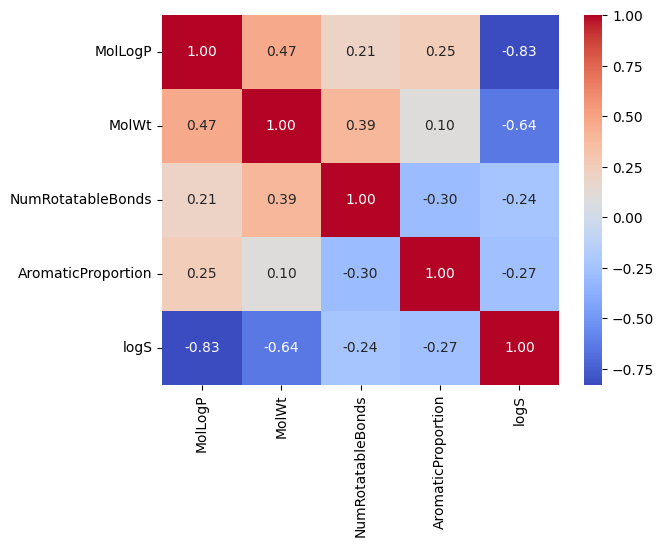

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})

## **Data Separation as X and Y**

In [6]:
y = df['logS']
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [9]:
X = df.drop(columns=['logS'])
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


## **Now Spliting for test and train data**

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [12]:
X_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
643,3.61260,296.410,0.0,0.272727
722,6.48760,226.448,13.0,0.000000
570,3.15380,284.746,1.0,0.600000
66,0.77880,74.123,2.0,0.000000
1002,1.82140,102.177,3.0,0.000000
...,...,...,...,...
1044,2.82960,253.305,1.0,0.631579
1095,2.10750,218.322,3.0,0.000000
1130,4.14820,335.282,7.0,0.260870
860,4.25720,275.179,4.0,0.352941


In [13]:
X_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
218,1.55740,102.177,3.0,0.000000
809,5.20590,345.653,4.0,0.571429
501,4.18090,339.218,4.0,0.545455
649,2.05760,286.349,4.0,0.315789
323,0.72822,146.153,0.0,0.909091
...,...,...,...,...
361,-0.50840,59.068,0.0,0.000000
292,1.94750,116.204,3.0,0.000000
1119,2.16090,257.437,3.0,0.000000
557,3.36680,138.254,0.0,0.000000


# **Model Building**

## **Linear Regration**

### **Training The Model**

In [18]:
from sklearn.linear_model import LinearRegression


In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### **Applying the model to make prediction**

In [16]:
pred_x_train = lr.predict(X_train)
pred_x_test = lr.predict(X_test)

pred_x_train


array([ -4.47026156,  -5.88839323,  -4.22029229,  -0.79352323,
        -1.73062942,  -1.26187649,  -1.43969557,  -2.36087206,
        -2.77481055,  -2.23755209,  -4.15424648,  -8.49226359,
        -4.26355722,  -1.5773174 ,  -2.61749814,  -0.72935686,
        -3.18513222,  -3.71048234,  -1.57995763,  -5.11539503,
        -1.90340063,  -4.18841892,  -4.85523085,  -2.13317387,
        -3.34701685,  -3.45842365,  -3.73715663,  -3.61882675,
        -3.02530867,  -2.82178231,  -1.54861269,  -2.73630968,
        -1.79353838,  -6.49056433,  -2.19068424,  -4.10802907,
        -2.7303035 ,  -2.28598248,  -2.60739155,  -3.64519507,
        -2.65218678,  -4.35285798,   1.91721982,  -3.70871993,
        -3.50138017,  -2.71898539,  -4.77720737,  -3.38184768,
        -1.71815824,  -2.79713356,  -5.26774517,  -2.96884167,
        -2.27709013,  -2.76017539,  -2.12748391,  -2.3140745 ,
        -7.74681081,  -3.21253144,  -1.76376134,  -4.17337487,
        -2.93249251,  -0.51506669,  -3.06834756,  -0.72

In [17]:
pred_x_test

array([-1.53917269, -6.08287944, -5.28375883, -3.27746087, -1.70320929,
       -5.63167711, -1.43239582, -2.74544339, -3.43274443, -3.79048137,
       -1.26884289, -1.54861269, -3.72258406, -3.25962057, -3.76344744,
       -2.13317387, -2.00365994, -4.80828381, -1.43582956, -2.81358533,
       -2.37870232, -1.45080608, -3.71048234, -3.06158669, -1.12854214,
       -1.11007232, -2.45566761, -5.0338893 , -3.29087978, -4.21832264,
       -2.45834377, -3.09200621, -3.89726792, -1.85208473, -2.17761301,
       -6.01542152, -1.06493784, -2.35071265, -1.72034021, -1.45695216,
       -1.85208473, -6.66998091, -1.23899725, -1.46015868, -1.65115215,
       -3.79048137, -4.73551134, -1.09859266, -0.69404611, -1.91048017,
       -3.16121056, -2.34753749, -2.01980335, -2.51436431, -7.04012802,
       -5.27488937, -4.18979204, -2.9647599 , -1.7364388 , -1.64388527,
       -4.60884756, -4.84900677, -0.18955927, -1.73839902, -1.63779456,
       -2.01616982, -1.46391856, -7.64117637, -1.34518182, -2.28

### **Evaluating MODEL performance**

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, pred_x_train)
lr_train_r2 = r2_score(y_train, pred_x_train)

lr_test_mse = mean_squared_error(y_test, pred_x_test)
lr_test_r2 = r2_score(y_test, pred_x_test)


In [25]:
print('LR MSE (Train)',lr_train_mse)
print('LR R2 (Train)',lr_train_r2)
print('LR MSE (Test)',lr_test_mse)
print('LR R2 (Test)',lr_test_r2)

LR MSE (Train) 1.0139894491573003
LR R2 (Train) 0.7695127746587307
LR MSE (Test) 0.9990844407075306
LR R2 (Test) 0.7705650058569232


In [26]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse ,lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Train MSE', 'Train R2', 'Test MSE', 'Test R2']
lr_results

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Linear regression,1.013989,0.769513,0.999084,0.770565


# **Random Forest**

### **Training Model**

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### **Applying the model to make prediction**

In [32]:
rf_x_train = rf.predict(X_train)
rf_x_test = rf.predict(X_test)

rf_x_train

array([-4.39406068, -7.01386075, -4.1790564 , -1.17794119, -2.2850991 ,
       -1.33950462, -1.25181203, -2.66705519, -2.65236412, -2.31264491,
       -4.1790564 , -7.01386075, -4.06327457, -1.33950462, -2.62909993,
       -1.17794119, -2.68110568, -4.39406068, -1.48786212, -5.44303134,
       -1.36708347, -4.39406068, -5.41614062, -1.48334237, -4.33728987,
       -4.09424671, -2.68110568, -2.48465432, -2.48465432, -4.3016489 ,
       -1.35145256, -2.68110568, -2.29709247, -7.01386075, -1.51301599,
       -4.33728987, -2.65236412, -2.66705519, -1.52706648, -4.09424671,
       -2.66705519, -4.39406068, -1.36550305, -4.39406068, -3.60378319,
       -2.65236412, -4.39406068, -4.39406068, -1.35145256, -2.68110568,
       -5.44303134, -3.50229491, -2.66705519, -2.66705519, -1.36550305,
       -2.65236412, -7.01386075, -2.68110568, -1.36550305, -4.09424671,
       -4.21302627, -1.17794119, -2.68110568, -1.35145256, -4.1790564 ,
       -1.51301599, -1.36550305, -7.01386075, -6.90556761, -3.70

In [33]:
rf_x_test

array([-1.33950462, -6.98577329, -4.39406068, -2.62909993, -1.35145256,
       -5.44303134, -1.35145256, -4.1790564 , -2.47266096, -4.33728987,
       -1.36550305, -1.35145256, -2.68110568, -2.8547836 , -3.70848106,
       -1.48334237, -2.49354382, -4.39406068, -1.25181203, -2.66705519,
       -2.49354382, -1.35145256, -4.39406068, -3.52046149, -1.17794119,
       -1.17794119, -2.49354382, -5.44303134, -2.62909993, -4.1790564 ,
       -1.48334237, -2.68110568, -4.37313972, -1.69041032, -2.66705519,
       -7.01386075, -1.17794119, -2.47146521, -2.29709247, -1.64276102,
       -1.69041032, -7.01386075, -1.36550305, -1.30996483, -2.29709247,
       -4.33728987, -4.09424671, -1.36550305, -1.17794119, -1.38179394,
       -3.60378319, -2.66705519, -1.36550305, -1.52706648, -7.01386075,
       -5.46984259, -4.07753611, -3.70848106, -1.25253761, -1.36550305,
       -4.39406068, -4.39406068, -1.17794119, -1.33950462, -2.29709247,
       -1.48347619, -1.36550305, -7.01386075, -1.36550305, -1.39

### **Evaluating MODEL performance**

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(y_train, rf_x_train)
rf_train_r2 = r2_score(y_train, rf_x_train)

rf_test_mse = mean_squared_error(y_test, rf_x_test)
rf_test_r2 = r2_score(y_test, rf_x_test)

In [36]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse ,rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Train MSE', 'Train R2', 'Test MSE', 'Test R2']
rf_results

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Random Forest,1.057186,0.759694,1.05209,0.758393


## **Model Comparison**

In [37]:
df_models = pd.concat([lr_results, rf_results], ignore_index=True)
df_models

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Linear regression,1.013989,0.769513,0.999084,0.770565
1,Random Forest,1.057186,0.759694,1.05209,0.758393


## **Data Visualization of Predicted Values**

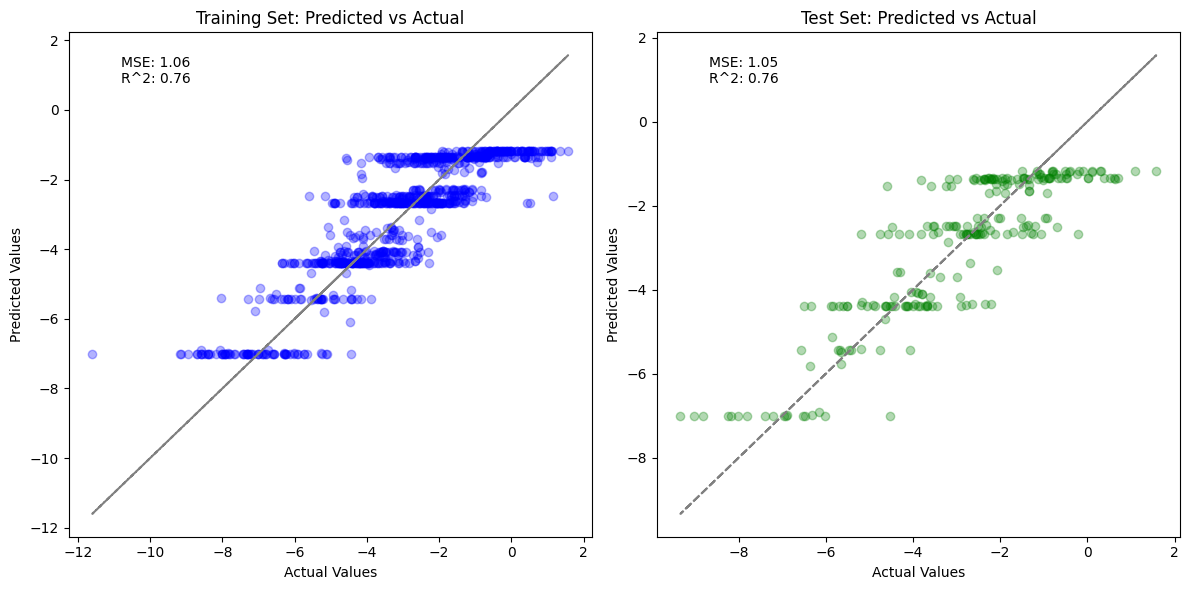

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Assuming rf_x_train and rf_x_test are arrays or lists containing predicted values
# y_train and y_test are arrays or lists containing actual values

# Compute MSE and R^2 for training set
rf_train_mse = mean_squared_error(y_train, rf_x_train)
rf_train_r2 = r2_score(y_train, rf_x_train)

# Compute MSE and R^2 for test set
rf_test_mse = mean_squared_error(y_test, rf_x_test)
rf_test_r2 = r2_score(y_test, rf_x_test)

# Scatter plot for training set
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, rf_x_train, color='blue', alpha=0.3)
plt.plot(y_train, y_train, color='gray', linestyle='--')  # Identity line
plt.title('Training Set: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.text(0.1, 0.9, f'MSE: {rf_train_mse:.2f}\nR^2: {rf_train_r2:.2f}', transform=plt.gca().transAxes)

# Scatter plot for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_x_test, color='green', alpha=0.3)
plt.plot(y_test, y_test, color='gray', linestyle='--')  # Identity line
plt.title('Test Set: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.text(0.1, 0.9, f'MSE: {rf_test_mse:.2f}\nR^2: {rf_test_r2:.2f}', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()
